In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
from transformers import AutoModel, AutoTokenizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.express as px
%matplotlib inline

In [3]:
train_raw_df = pd.read_csv("../../data/input/hugging_face/train_raw.csv")
train_raw_df = train_raw_df.sample(frac=1, random_state=4)


test_df = pd.read_csv("../../data/input/hugging_face/test.csv")


In [4]:
print(train_raw_df.shape)

(325, 2)


In [5]:
batch_raw = pd.concat([train_raw_df,test_df],
axis=0,
ignore_index=True)
batch_raw.to_csv("../../data/input/hugging_face/data_val/raw_train_test.csv")


In [6]:
print(batch_raw.shape)

(494, 2)


In [7]:
# For DistilBERT:
# model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
# model_class, tokenizer_class, pretrained_weights= (ppb.RobertaModel,ppb.RobertaTokenizer,"roberta-base")
## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
#model_class, tokenizer_class, pretrained_weights = (ppb.ElectraModel, ppb.ElectraTokenizer, 'google/electra-small-discriminator')
idx = 0
tensor_idx = 0 if idx == 0 else -1
model_names = ["google/fnet-base","xlnet-base-cased"]
# Load pretrained model/tokenizer
model_na = model_names[idx].split("/")[-1] if len(model_names[idx].split("/")) > 1 else model_names[idx]
tokenizer = AutoTokenizer.from_pretrained(model_names[idx])
model = AutoModel.from_pretrained(model_names[idx])

Some weights of the model checkpoint at google/fnet-base were not used when initializing FNetModel: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing FNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
tokenized_raw = batch_raw["Question"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
questions = batch_raw["Question"].to_list()
features_raw = []
for question in questions:
    inputs = tokenizer(question, return_tensors="pt")
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state[:,tensor_idx,:] # -1 for xlnet, 0 for fnet 
    print(last_hidden_states.shape)
    features_raw.append(last_hidden_states)

torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1

In [9]:
labels_raw = batch_raw["op_id"]
features_raw = [ts.detach().numpy().ravel() for ts in features_raw]

In [10]:
features_raw = np.asarray(features_raw)

In [11]:
print(labels_raw.shape)
print(features_raw.shape)

(494,)
(494, 768)


In [12]:
train_raw_shape = train_raw_df.shape
train_raw_features = features_raw[:train_raw_shape[0]]
test_raw_features = features_raw[train_raw_shape[0]:]
train_raw_labels = labels_raw[:train_raw_shape[0]]
test_raw_labels =labels_raw[train_raw_shape[0]:] 
np.savetxt(f"../../../../text-classification-small-datasets/datasets/train_feature_{model_na}.csv",train_raw_features,delimiter=",")
np.savetxt(f"../../../../text-classification-small-datasets/datasets/train_label_{model_na}.csv",train_raw_labels,delimiter=",")
np.savetxt(f"../../../../text-classification-small-datasets/datasets/test_feature_{model_na}.csv",test_raw_features,delimiter=",")
np.savetxt(f"../../../../text-classification-small-datasets/datasets/test_label_{model_na}.csv",test_raw_labels,delimiter=",")

In [13]:
print(train_raw_features.shape)
print(test_raw_features.shape)
print(train_raw_labels.shape)
print(test_raw_labels.shape)

(325, 768)
(169, 768)
(325,)
(169,)


In [14]:
train_eda_shape = train_eda_df.shape
train_eda_features = features_eda[:train_eda_shape[0]]
test_eda_features = features_eda[train_eda_shape[0]:]
train_eda_labels = labels_eda[:train_eda_shape[0]]
test_eda_labels =labels_eda[train_eda_shape[0]:] 

NameError: name 'train_eda_df' is not defined

In [ ]:
print(train_eda_features.shape)
print(test_eda_features.shape)
print(train_eda_labels.shape)
print(test_eda_labels.shape)

(1009, 768)
(87, 768)
(1009,)
(87,)


In [ ]:
train_raw_features.shape

(101, 768)

In [ ]:
train_eda_features.shape

(1009, 768)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

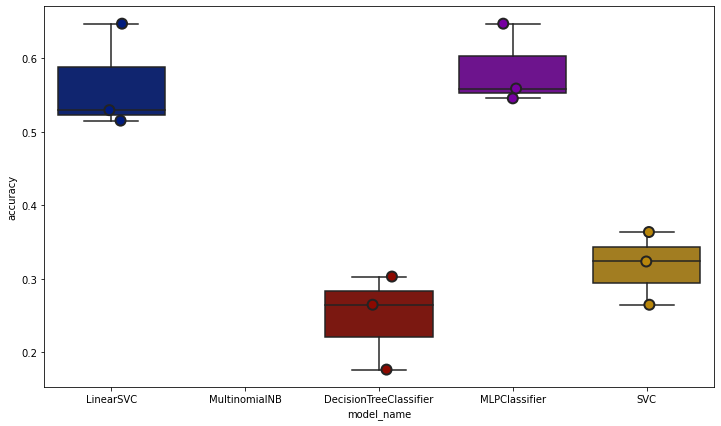

In [ ]:
models = [
    LinearSVC(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    MLPClassifier( solver="adam", random_state=2343, hidden_layer_sizes=(),activation="identity"),
    SVC(kernel='poly',
        random_state=494,
        degree=7
    )
]

CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,train_raw_features, train_raw_labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

plt.figure(figsize=[12,7])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.savefig("../../figures/huggingface/test.png",bbox_inches='tight')
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.248069
LinearSVC                 0.563874
MLPClassifier             0.583779
MultinomialNB                  NaN
SVC                       0.317291
Name: accuracy, dtype: float64

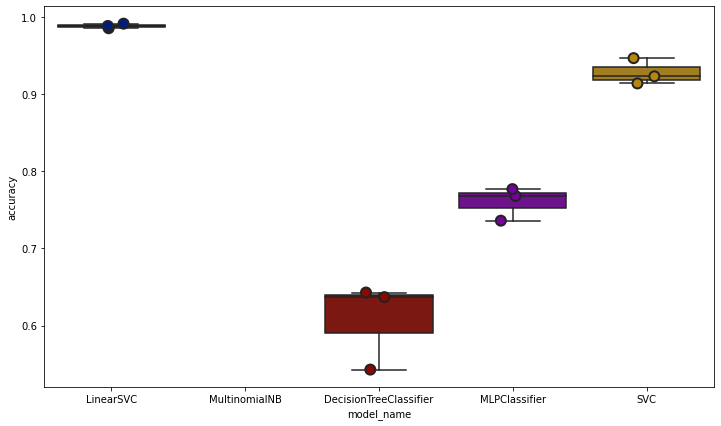

In [ ]:
models = [
    LinearSVC(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    MLPClassifier( solver="sgd", random_state=2343),
    SVC(kernel='poly',
        random_state=494,
        degree=7
    )
]

CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,train_eda_features, train_eda_labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

plt.figure(figsize=[12,7])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.607596
LinearSVC                 0.988110
MLPClassifier             0.760183
MultinomialNB                  NaN
SVC                       0.927656
Name: accuracy, dtype: float64

In [ ]:
# parameters = {'C': np.linspace(0.0001, 100, 20)}
# grid_search = GridSearchCV(LogisticRegression(), parameters)
# grid_search.fit(train_features, train_labels)

# print('best parameters: ', grid_search.best_params_)
# print('best scrores: ', grid_search.best_score_)

[50  0  5  2 50 14  2 18 27  8  8  8  8  6  6  6  6  6  8  8  8  8  8  8
  8  8  8  8 53 53 53  8 19 19 46 46 46 46 44 39 39 39 21 14 14 19  5 15
 15 16 28  0  5  5  5  5 11 11  0 28  2 16 32 28 28 28 27 27 50  5 11  5
  0 21 21  0  0 18  0 14 53  0  0 50 18 13 13]


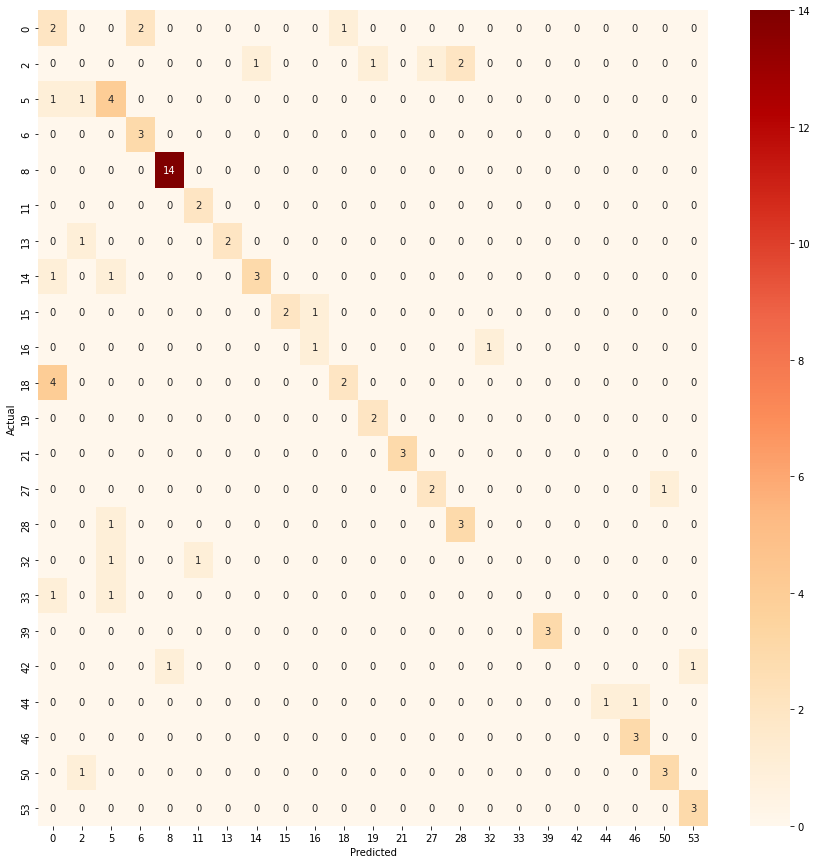

In [ ]:
model = LinearSVC(max_iter=3000, tol=1e-2)

model.fit(train_raw_features, train_raw_labels)
y_pred = model.predict(test_raw_features)
print(y_pred)


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_raw_labels, y_pred)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sorted(list(set(test_raw_labels.values))), 
            yticklabels=sorted(list(set(test_raw_labels.values))),
            cmap='OrRd'
            )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics

unique_keys = sorted(list(set(test_raw_labels.values)))
print('accuracy %s' %metrics.accuracy_score(y_pred,test_raw_labels))

accuracy 0.6666666666666666


In [ ]:
model.score(test_raw_features,test_raw_labels)

0.6666666666666666

[50  0 27  2 50 14  2 46 27  8  8  8  8  6  6  6  6  6  8  8  8  8  8  8
  8  8  8  8 53 53 53  6 19 19 46 46 46 46 44 39 39 39 21 14 14 19  5 15
 15 16 28  0  5  5  5  5 11 11  0 28 32 16 28 28 28 28 27 27 16 28 11 33
  0 21 21  6 33 18  0  0 53  0  0 50 18 13 13]


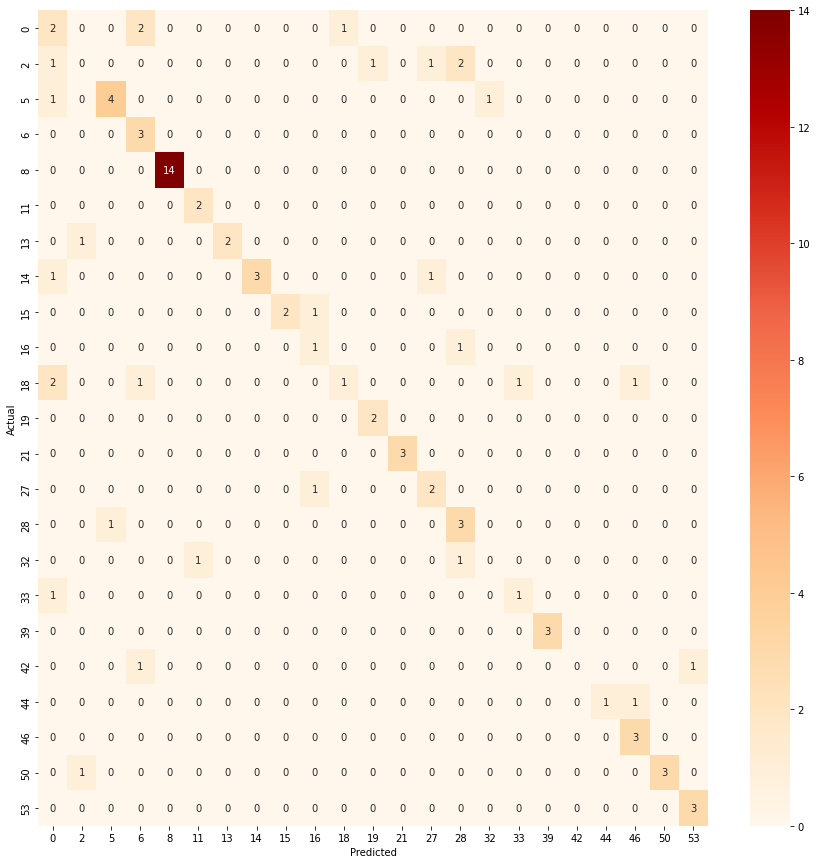

In [ ]:
model = LinearSVC(max_iter=3000,C=1,tol=1e-3)    

model.fit(train_eda_features, train_eda_labels)
y_pred = model.predict(test_eda_features)
print(y_pred)




from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_eda_labels, y_pred)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sorted(list(set(test_raw_labels.values))), 
            yticklabels=sorted(list(set(test_raw_labels.values))),
            cmap='OrRd'
            )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print('accuracy %s' %metrics.accuracy_score(y_pred,test_eda_labels))

accuracy 0.6666666666666666
